In [1]:
from selenium import webdriver
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException
PATH="C:\Program Files\chromedriver.exe"
browser=webdriver.Chrome(PATH)
browser.get("https://www.sahibinden.com/otomobil?viewType=Classic&query_text_mf=araba&query_text=araba")

In [2]:
rows=len(browser.find_elements_by_xpath("//html/body/div[4]/div[4]/form/div/div[3]/table/tbody/tr"))
cols=len(browser.find_elements_by_xpath("//html/body/div[4]/div[4]/form/div/div[3]/table/tbody/tr[1]/td"))
rows,cols

(23, 12)

In [3]:
list1=[]

for i in range(1,rows+1):
    for r in range(1,cols+1):
        try :
            value=browser.find_element_by_xpath("//html/body/div[4]/div[4]/form/div/div[3]/table/tbody/tr["+str(i)+"]/td["+str(r)+"]").text
                
        except NoSuchElementException:
            pass
    
        list1.append(value.split())
        value+=value 


In [4]:
a=2

while a <=50:
    
    try:
        browser.execute_script("window.scrollTo(0, 2400)") 
        button=browser.find_element_by_link_text(str(a))
        button.click()
        time.sleep(10)
    
    except NoSuchElementException:
        pass
    
    except ElementClickInterceptedException:
        pass
        
                
    
    for i in range(1,rows+1):
        for r in range(1,cols+1):
            try :
                value=browser.find_element_by_xpath("//html/body/div[4]/div[4]/form/div/div[3]/table/tbody/tr["+str(i)+"]/td["+str(r)+"]").text

            except NoSuchElementException:
                pass

            list1.append(value.split())
            value+=value
    a+=1


In [5]:
composite_list = [list1[x:x+12] for x in range(0, len(list1),12)]
import pandas as pd
df = pd.DataFrame(composite_list)
df

0          1              2                       3  \
0     []  [Citroën]           [C4]   [1.6, e-HDi, Confort]   
1     []  [Hyundai]    [i20, Troy]       [1.2, DOHC, Team]   
2     []  [Renault]       [Megane]  [1.5, dCi, Expression]   
3     []         []             []                      []   
4     []         []             []                      []   
...   ..        ...            ...                     ...   
1145  []     [Opel]        [Astra]      [1.6, CDTI, Sport]   
1146  []  [Hyundai]  [Accent, Era]             [1.4, Team]   
1147  []     [Lada]       [Samara]                   [1.5]   
1148  []     [Fiat]        [Bravo]               [1.6, SX]   
1149  []         []             []                      []   

                                                      4       5          6  \
0     [İKİZLERARABAM'DAN, SATILIK, OTOMATİK, VİTES, ...  [2015]  [148.000]   
1      [İKİZLERARABAM'DAN, SATILIK, HYUNDAİ, İ20, TROY]  [2011]   [94.000]   
2     [İKİZLERARABAM'DAN, SATILIK, 2010, MEGANE, 3, ...  [2010]  [227.933]   
3                                                    []      []         []   
4                                                    []      []         []   
...                                                 ...     ...        ...   
1145                               [Opel, Astra, Sport]  [2014]  [125.000]   
1146                       [Araba, Hunday, Accent, era]  [2008]      [120]   
1147                            [Bakımlı, temiz, araba]  [1992]  [110.000]   
1148                         [sahibinden, temiz, araba]  [2000]  [216.000]   
1149                                                 []      []         []   

              7              8                 9                       10  11  
0       [Beyaz]  [144.000, TL]  [21, Ocak, 2021]  [Gaziantep, Şehitkamil]  []  
1       [Beyaz]   [77.000, TL]  [21, Ocak, 2021]  [Gaziantep, Şehitkamil]  []  
2       [Siyah]   [88.000, TL]  [20, Ocak, 2021]  [Gaziantep, Şehitkamil]  []  
3            []             []                []                       []  []  
4            []             []                []                       []  []  
...         ...            ...               ...                      ...  ..  
1145    [Beyaz]  [133.000, TL]  [08, Ocak, 2021]      [Gaziantep, Araban]  []  
1146     [Mavi]   [83.000, TL]  [08, Ocak, 2021]     [Diyarbakır, Bağlar]  []  
1147  [Kırmızı]   [20.750, TL]  [08, Ocak, 2021]      [İzmir, Karabağlar]  []  
1148  [Kırmızı]   [38.000, TL]  [10, Ocak, 2021]       [Bursa, Osmangazi]  []  
1149         []             []                []                       []  []  

[1150 rows x 12 columns]

In [6]:
list2=[]
   
for c in range(1,cols+1):
    values=browser.find_element_by_xpath("//html/body/div[4]/div[4]/form/div/div[3]/table/thead/tr/td["+str(c)+"]").text
    list2.append(values)
    values+=values

In [7]:
df2 = pd.DataFrame(list2)

In [8]:
df2 = df2.transpose()
df.columns = df2.iloc[0]
df

0             Marka           Seri                   Model  \
0     []  [Citroën]           [C4]   [1.6, e-HDi, Confort]   
1     []  [Hyundai]    [i20, Troy]       [1.2, DOHC, Team]   
2     []  [Renault]       [Megane]  [1.5, dCi, Expression]   
3     []         []             []                      []   
4     []         []             []                      []   
...   ..        ...            ...                     ...   
1145  []     [Opel]        [Astra]      [1.6, CDTI, Sport]   
1146  []  [Hyundai]  [Accent, Era]             [1.4, Team]   
1147  []     [Lada]       [Samara]                   [1.5]   
1148  []     [Fiat]        [Bravo]               [1.6, SX]   
1149  []         []             []                      []   

0                                          İlan Başlığı     Yıl         KM  \
0     [İKİZLERARABAM'DAN, SATILIK, OTOMATİK, VİTES, ...  [2015]  [148.000]   
1      [İKİZLERARABAM'DAN, SATILIK, HYUNDAİ, İ20, TROY]  [2011]   [94.000]   
2     [İKİZLERARABAM'DAN, SATILIK, 2010, MEGANE, 3, ...  [2010]  [227.933]   
3                                                    []      []         []   
4                                                    []      []         []   
...                                                 ...     ...        ...   
1145                               [Opel, Astra, Sport]  [2014]  [125.000]   
1146                       [Araba, Hunday, Accent, era]  [2008]      [120]   
1147                            [Bakımlı, temiz, araba]  [1992]  [110.000]   
1148                         [sahibinden, temiz, araba]  [2000]  [216.000]   
1149                                                 []      []         []   

0          Renk          Fiyat       İlan Tarihi                İl / İlçe      
0       [Beyaz]  [144.000, TL]  [21, Ocak, 2021]  [Gaziantep, Şehitkamil]  []  
1       [Beyaz]   [77.000, TL]  [21, Ocak, 2021]  [Gaziantep, Şehitkamil]  []  
2       [Siyah]   [88.000, TL]  [20, Ocak, 2021]  [Gaziantep, Şehitkamil]  []  
3            []             []                []                       []  []  
4            []             []                []                       []  []  
...         ...            ...               ...                      ...  ..  
1145    [Beyaz]  [133.000, TL]  [08, Ocak, 2021]      [Gaziantep, Araban]  []  
1146     [Mavi]   [83.000, TL]  [08, Ocak, 2021]     [Diyarbakır, Bağlar]  []  
1147  [Kırmızı]   [20.750, TL]  [08, Ocak, 2021]      [İzmir, Karabağlar]  []  
1148  [Kırmızı]   [38.000, TL]  [10, Ocak, 2021]       [Bursa, Osmangazi]  []  
1149         []             []                []                       []  []  

[1150 rows x 12 columns]

In [10]:
df['Marka'] = df['Marka'].str.join(',')
df['Seri'] = df['Seri'].str.join(',')
df['Model'] = df['Model'].str.join(',')
df['İlan Başlığı'] = df['İlan Başlığı'].str.join(',')
df['Yıl'] = df['Yıl'].str.join(',')
df['KM'] = df['KM'].str.join(',')
df['Renk'] = df['Renk'].str.join(',')
df['Fiyat'] = df['Fiyat'].str.join(',')
df['İlan Tarihi'] = df['İlan Tarihi'].str.join(',')
df['İl / İlçe'] = df['İl / İlçe'].str.join(',')

In [11]:
df = df.drop(df.columns[[0,11]], axis=1)
df

0       Marka        Seri               Model  \
0     Citroën          C4   1.6,e-HDi,Confort   
1     Hyundai    i20,Troy       1.2,DOHC,Team   
2     Renault      Megane  1.5,dCi,Expression   
3                                               
4                                               
...       ...         ...                 ...   
1145     Opel       Astra      1.6,CDTI,Sport   
1146  Hyundai  Accent,Era            1.4,Team   
1147     Lada      Samara                 1.5   
1148     Fiat       Bravo              1.6,SX   
1149                                            

0                                          İlan Başlığı   Yıl       KM  \
0     İKİZLERARABAM'DAN,SATILIK,OTOMATİK,VİTES,CİTRO...  2015  148.000   
1            İKİZLERARABAM'DAN,SATILIK,HYUNDAİ,İ20,TROY  2011   94.000   
2       İKİZLERARABAM'DAN,SATILIK,2010,MEGANE,3,105'LİK  2010  227.933   
3                                                                        
4                                                                        
...                                                 ...   ...      ...   
1145                                   Opel,Astra,Sport  2014  125.000   
1146                            Araba,Hunday,Accent,era  2008      120   
1147                                Bakımlı,temiz,araba  1992  110.000   
1148                             sahibinden,temiz,araba  2000  216.000   
1149                                                                     

0        Renk       Fiyat   İlan Tarihi             İl / İlçe  
0       Beyaz  144.000,TL  21,Ocak,2021  Gaziantep,Şehitkamil  
1       Beyaz   77.000,TL  21,Ocak,2021  Gaziantep,Şehitkamil  
2       Siyah   88.000,TL  20,Ocak,2021  Gaziantep,Şehitkamil  
3                                                              
4                                                              
...       ...         ...           ...                   ...  
1145    Beyaz  133.000,TL  08,Ocak,2021      Gaziantep,Araban  
1146     Mavi   83.000,TL  08,Ocak,2021     Diyarbakır,Bağlar  
1147  Kırmızı   20.750,TL  08,Ocak,2021      İzmir,Karabağlar  
1148  Kırmızı   38.000,TL  10,Ocak,2021       Bursa,Osmangazi  
1149                                                           

[1150 rows x 10 columns]

In [ ]:
import numpy as np
df.replace('', np.nan, inplace=True)

In [16]:
df=df.dropna(how="all")

In [17]:
df

0          Marka        Seri                     Model  \
0        Citroën          C4         1.6,e-HDi,Confort   
1        Hyundai    i20,Troy             1.2,DOHC,Team   
2        Renault      Megane        1.5,dCi,Expression   
5           Fiat       Linea  1.3,Multijet,Active,Plus   
6           Opel       Astra                    1.6,CD   
...          ...         ...                       ...   
1144  Mitsubishi     Carisma          1.8,GDI,Elegance   
1145        Opel       Astra            1.6,CDTI,Sport   
1146     Hyundai  Accent,Era                  1.4,Team   
1147        Lada      Samara                       1.5   
1148        Fiat       Bravo                    1.6,SX   

0                                          İlan Başlığı   Yıl       KM  \
0     İKİZLERARABAM'DAN,SATILIK,OTOMATİK,VİTES,CİTRO...  2015  148.000   
1            İKİZLERARABAM'DAN,SATILIK,HYUNDAİ,İ20,TROY  2011   94.000   
2       İKİZLERARABAM'DAN,SATILIK,2010,MEGANE,3,105'LİK  2010  227.933   
5     İKİZLERARABAM'DAN,SATILIK,2013,MODEL,HATA,YOK,...  2013  183.566   
6       İKİZLERARABAM'DAN,SATILIK,1998,MODEL,OPEL,ASTRA  1998  275.745   
...                                                 ...   ...      ...   
1144           Şahin,doğan,parasına,Mercedes,gibi,araba  1999  239.000   
1145                                   Opel,Astra,Sport  2014  125.000   
1146                            Araba,Hunday,Accent,era  2008      120   
1147                                Bakımlı,temiz,araba  1992  110.000   
1148                             sahibinden,temiz,araba  2000  216.000   

0          Renk       Fiyat   İlan Tarihi             İl / İlçe  
0         Beyaz  144.000,TL  21,Ocak,2021  Gaziantep,Şehitkamil  
1         Beyaz   77.000,TL  21,Ocak,2021  Gaziantep,Şehitkamil  
2         Siyah   88.000,TL  20,Ocak,2021  Gaziantep,Şehitkamil  
5     Gümüş,Gri   94.500,TL  20,Ocak,2021  Gaziantep,Şehitkamil  
6      Lacivert   55.000,TL  20,Ocak,2021  Gaziantep,Şehitkamil  
...         ...         ...           ...                   ...  
1144   Lacivert   43.000,TL  08,Ocak,2021     Kırklareli,Merkez  
1145      Beyaz  133.000,TL  08,Ocak,2021      Gaziantep,Araban  
1146       Mavi   83.000,TL  08,Ocak,2021     Diyarbakır,Bağlar  
1147    Kırmızı   20.750,TL  08,Ocak,2021      İzmir,Karabağlar  
1148    Kırmızı   38.000,TL  10,Ocak,2021       Bursa,Osmangazi  

[1001 rows x 10 columns]

In [21]:
df.head(10)

0                                               Marka  \
0                                             Citroën   
1                                             Hyundai   
2                                             Renault   
5                                                Fiat   
6                                                Opel   
7                                             Renault   
8                                                Seat   
9                                              Toyota   
10  Siz,de,ilanınızın,yukarıda,yer,almasını,istiyo...   
11                                         Volkswagen   

0                                                Seri  \
0                                                  C4   
1                                            i20,Troy   
2                                              Megane   
5                                               Linea   
6                                               Astra   
7                                              Megane   
8                                               Ibiza   
9                                             Corolla   
10  Siz,de,ilanınızın,yukarıda,yer,almasını,istiyo...   
11                                             Passat   

0                                               Model  \
0                                   1.6,e-HDi,Confort   
1                                       1.2,DOHC,Team   
2                                  1.5,dCi,Expression   
5                            1.3,Multijet,Active,Plus   
6                                              1.6,CD   
7                                     1.6,Authentique   
8                                       1.4,Reference   
9                                      1.4,D-4D,Terra   
10  Siz,de,ilanınızın,yukarıda,yer,almasını,istiyo...   
11                       1.6,TDI,BlueMotion,Trendline   

0                                        İlan Başlığı  \
0   İKİZLERARABAM'DAN,SATILIK,OTOMATİK,VİTES,CİTRO...   
1          İKİZLERARABAM'DAN,SATILIK,HYUNDAİ,İ20,TROY   
2     İKİZLERARABAM'DAN,SATILIK,2010,MEGANE,3,105'LİK   
5   İKİZLERARABAM'DAN,SATILIK,2013,MODEL,HATA,YOK,...   
6     İKİZLERARABAM'DAN,SATILIK,1998,MODEL,OPEL,ASTRA   
7   İKİZLERARABAM'DAN,SATILIK,2008,MEGANE,2,AUTHEN...   
8           İKİZLERARABAM'DAN,SATILIK,2011,SEAT,IBIZA   
9            İKİZLERARABAM'DAN,SATILIK,TOYOTA,COROLLA   
10  Siz,de,ilanınızın,yukarıda,yer,almasını,istiyo...   
11      ÖZÇELİKLER'DEN,2017,MODEL,BOYASIZ,TEMİZ,ARABA   

0                                                 Yıl  \
0                                                2015   
1                                                2011   
2                                                2010   
5                                                2013   
6                                                1998   
7                                                2008   
8                                                2011   
9                                                2006   
10  Siz,de,ilanınızın,yukarıda,yer,almasını,istiyo...   
11                                               2017   

0                                                  KM  \
0                                             148.000   
1                                              94.000   
2                                             227.933   
5                                             183.566   
6                                             275.745   
7                                             289.261   
8                                             206.539   
9                                             398.116   
10  Siz,de,ilanınızın,yukarıda,yer,almasını,istiyo...   
11                                            135.000   

0                                                Renk  \
0                                               Beyaz   
1                                               Beyaz   
2                                               Siyah   
5   

In [25]:
df = df.drop(10) 

In [26]:
df['Yıl'] = pd.to_datetime(df.Yıl).dt.year

df.rename({'İlan Tarihi': 'İlan_Tarihi'}, axis=1, inplace=True)

df['İlan_Tarihi'] = df['İlan_Tarihi'].str.replace(',','-')
df['İlan_Tarihi'] = df['İlan_Tarihi'].str.replace('Ocak','1')
df['İlan_Tarihi'] = df['İlan_Tarihi'].str.replace('Şubat','2')
df['İlan_Tarihi'] = df['İlan_Tarihi'].str.replace('Mart','3')
df['İlan_Tarihi'] = df['İlan_Tarihi'].str.replace('Nisan,','4')
df['İlan_Tarihi'] = df['İlan_Tarihi'].str.replace('Mayıs','5')
df['İlan_Tarihi'] = df['İlan_Tarihi'].str.replace('Haziran','6')
df['İlan_Tarihi'] = df['İlan_Tarihi'].str.replace('Temmuz','7')
df['İlan_Tarihi'] = df['İlan_Tarihi'].str.replace('Ağustos','8')
df['İlan_Tarihi'] = df['İlan_Tarihi'].str.replace('Eylül','9')
df['İlan_Tarihi'] = df['İlan_Tarihi'].str.replace('Ekim','10')
df['İlan_Tarihi'] = df['İlan_Tarihi'].str.replace('Kasım','11')
df['İlan_Tarihi'] = df['İlan_Tarihi'].str.replace('Aralık','12')

In [27]:
df['İlan_Tarihi'] = pd.to_datetime(df.İlan_Tarihi, format='%d-%m-%Y')

In [28]:
df['Fiyat'] = df['Fiyat'].str.replace('.', '')
df['Fiyat'] = df['Fiyat'].str.replace('TL', '')
df['Fiyat'] = df['Fiyat'].str.replace(',', '').astype(int)
df['KM'] = df['KM'].str.replace('.', '').astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1148
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Marka         1000 non-null   object        
 1   Seri          1000 non-null   object        
 2   Model         1000 non-null   object        
 3   İlan Başlığı  1000 non-null   object        
 4   Yıl           1000 non-null   int64         
 5   KM            1000 non-null   int32         
 6   Renk          1000 non-null   object        
 7   Fiyat         1000 non-null   int32         
 8   İlan_Tarihi   1000 non-null   datetime64[ns]
 9   İl / İlçe     1000 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(6)
memory usage: 78.1+ KB


In [30]:
df1 = df['Model'].str.split(",",n=1, expand=True)
df1.columns = ['Model{}'.format(x+1) for x in df1.columns]


Model1                Model2
0       1.6         e-HDi,Confort
1       1.2             DOHC,Team
2       1.5        dCi,Expression
5       1.3  Multijet,Active,Plus
6       1.6                    CD
...     ...                   ...
1144    1.8          GDI,Elegance
1145    1.6            CDTI,Sport
1146    1.4                  Team
1147    1.5                  None
1148    1.6                    SX

[1000 rows x 2 columns]

In [31]:
df2 = df['İl / İlçe'].str.split(",",n=1, expand=True)
df2.columns = ['İl / İlçe{}'.format(x+1) for x in df2.columns]

İl / İlçe1  İl / İlçe2
0      Gaziantep  Şehitkamil
1      Gaziantep  Şehitkamil
2      Gaziantep  Şehitkamil
5      Gaziantep  Şehitkamil
6      Gaziantep  Şehitkamil
...          ...         ...
1144  Kırklareli      Merkez
1145   Gaziantep      Araban
1146  Diyarbakır      Bağlar
1147       İzmir  Karabağlar
1148       Bursa   Osmangazi

[1000 rows x 2 columns]

In [32]:
df3 = df['İlan Başlığı'].str.split(",",n=1, expand=True)
df3.columns = ['İlan Başlığı{}'.format(x+1) for x in df3.columns]

In [33]:
dataset=pd.concat([df['İlan_Tarihi'],df['Yıl'],df['Marka'], df['Seri'],df1['Model1'],df3['İlan Başlığı1'],df['Renk'],df['KM'],df2['İl / İlçe1'],df2['İl / İlçe2'],df['Fiyat']], axis=1)

In [34]:
import pandas as pd
from IPython.display import display
pd.options.display.max_rows = None
display(dataset)

İlan_Tarihi   Yıl            Marka              Seri       Model1  \
0     2021-01-21  2015          Citroën                C4          1.6   
1     2021-01-21  2011          Hyundai          i20,Troy          1.2   
2     2021-01-20  2010          Renault            Megane          1.5   
5     2021-01-20  2013             Fiat             Linea          1.3   
6     2021-01-20  1998             Opel             Astra          1.6   
7     2021-01-13  2008          Renault            Megane          1.6   
8     2021-01-12  2011             Seat             Ibiza          1.4   
9     2021-01-11  2006           Toyota           Corolla          1.4   
11    2021-01-23  2017       Volkswagen            Passat          1.6   
12    2021-01-23  2012             Opel             Corsa          1.4   
13    2021-01-23  1999          Peugeot               206          1.6   
14    2021-01-23  2017          Citroën                C4          1.6   
15    2021-01-23  2012             Fiat             Linea          1.3   
16    2021-01-23  2005       Volkswagen              Bora          1.6   
17    2021-01-23  2011          Citroën                C5          1.6   
18    2021-01-23  2003             Opel             Corsa          1.7   
19    2021-01-23  2008          Renault              Clio          1.4   
20    2021-01-23  1992          Renault              R,11        Flash   
21    2021-01-23  2018             Opel             Astra          1.6   
22    2021-01-23  2000             Lada              Vega          1.5   
23    2021-01-23  2011          Citroën                C5          1.6   
24    2021-01-23  2013             Fiat             Linea          1.3   
25    2021-01-23  2003             Opel             Corsa          1.7   
28    2021-01-23  2008          Renault              Clio          1.4   
29    2021-01-23  2016             Opel             Astra          1.6   
30    2021-01-23  1992             Fiat            Tempra          1.6   
31    2021-01-23  1992          Renault              R,11        Flash   
32    2021-01-23  2018             Opel             Astra          1.6   
33    2021-01-23  2000             Lada              Vega          1.5   
34    2021-01-23  2015          Hyundai       Accent,Blue          1.6   
35    2021-01-23  2011       Volkswagen             Jetta          1.6   
36    2021-01-23  2011             Ford            Fiesta          1.4   
37    2021-01-23  2011             Tata             Vista          1.4   
38    2021-01-23  2005        Chevrolet             Spark          1.0   
39    2021-01-23  2007             Fiat             Punto       Grande   
40    2021-01-23  2016          Renault           Fluence          1.5   
41    2021-01-23  1999          Renault               R,9          1.4   
42    2021-01-23  2013             Ford             Focus          1.6   
43    2021-01-23  2011       Volkswagen            Passat          1.4   
44    2021-01-23  1995             Opel            Vectra          2.0   
46    2021-01-23  2011              Kia              Ceed          1.6   
47    2021-01-23  1996          Renault              R,19          1.6   
48    2021-01-23  2014          Renault           Fluence          1.5   
51    2021-01-22  1993  Mercedes,-,Benz          E,Serisi            E   
52    2021-01-22  2012             Ford             Focus          1.6   
53    2021-01-22  2005          Peugeot               206          1.4   
54    2021-01-22  2016          Hyundai               i20          1.2   
55    2021-01-22  2004          Renault              Clio          1.5   
56    2021-01-22  2003             Fiat             Palio          1.2   
57    2021-01-22  2001          Renault            Megane          1.6   
58    2021-01-22  2001       Volkswagen              Golf          1.6   
59    2021-01-22  2009           Toyota             Auris          1.4   
60    2021-01-22  2008             Fiat             Linea          1.3   
61    202

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1148
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   İlan_Tarihi    1000 non-null   datetime64[ns]
 1   Yıl            1000 non-null   int64         
 2   Marka          1000 non-null   object        
 3   Seri           1000 non-null   object        
 4   Model1         1000 non-null   object        
 5   İlan Başlığı1  1000 non-null   object        
 6   Renk           1000 non-null   object        
 7   KM             1000 non-null   int32         
 8   İl / İlçe1     1000 non-null   object        
 9   İl / İlçe2     999 non-null    object        
 10  Fiyat          1000 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(7)
memory usage: 85.9+ KB


In [39]:
# dataset.groupby("İlan_Tarihi")["İlan_Tarihi"].count().sort_values()
# dataset.groupby("Yıl")["Yıl"].count().sort_values()
# dataset.groupby("Marka")["Marka"].count().sort_values()
# dataset.groupby("Seri")["Seri"].count().sort_values()
# dataset.groupby("Model1")["Model1"].count().sort_values()
dataset.groupby("İlan Başlığı1")["İlan Başlığı1"].count().sort_values()
# dataset.groupby("Renk")["Renk"].count().sort_values()
# dataset.groupby("KM")["KM"].count().sort_values()
# dataset.groupby("İl / İlçe1")["İl / İlçe1"].count().sort_values()
# dataset.groupby("Fiyat")["Fiyat"].count().sort_values()

İlan Başlığı1
!!!                                   1
SEVEREK                               1
SAĞLIK                                1
SATILIK                               1
Renault                               1
RENAULT                               1
PİYASAYA                              1
Peugeot                               1
SINIFIN                               1
POLİS'ten                             1
PARK                                  1
PARAM                                 1
Oto                                   1
Orijinal                              1
Ocak                                  1
OTOMATİK                              1
ORİJİNAL                              1
PEUGEOT                               1
ORİJNAL                               1
SINIFININ                             1
Saat                                  1
Trafikçiden                           1
Toyota                                1
Tofaş                                 1
Titiz                     

In [37]:
from pandas_profiling import ProfileReport
profile=ProfileReport(dataset,title="sahibindenComArabalar",html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
 dataset.to_csv('sahibindencomAraba.csv') 

In [40]:
dataset.isnull().sum()

İlan_Tarihi      0
Yıl              0
Marka            0
Seri             0
Model1           0
İlan Başlığı1    0
Renk             0
KM               0
İl / İlçe1       0
İl / İlçe2       1
Fiyat            0
dtype: int64

In [50]:
from pycaret.regression import *
clf1 = setup(data = dataset, target = 'Fiyat',ignore_features=['İlan Başlığı1'],categorical_imputation="constant",date_features =["Yıl"],numeric_features = ["KM"])

In [45]:
clf1

(<MLUsecase.CLASSIFICATION: 1>, 0       144000
 1        77000
 2        88000
 5        94500
 6        55000
          ...  
 1144     43000
 1145    133000
 1146     83000
 1147     20750
 1148     38000
 Name: Fiyat, Length: 1000, dtype: int32, '53ad', StratifiedKFold(n_splits=10, random_state=7856, shuffle=False), Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False),             KM  Marka_Audi  Marka_BMW  Marka_Chevrolet  Marka_Citroën  \
 44    278000.0         0.0        0.0              0.0            0.0   
 887      115.0         0.0        0.0              0.0            0.0   
 696     5900.0         0.0        0.0              0.0            0.0   
 652    98000.0         0.0        0.0              0.0            0.0   
 351   162500.0         0.0        0.0              0.0            0.0   
 ...        ...         ...        ...              ...            ...   
 754   210000.0         0.0        1.0              0.0            0.0   
 20    3652

In [51]:
compare_models()

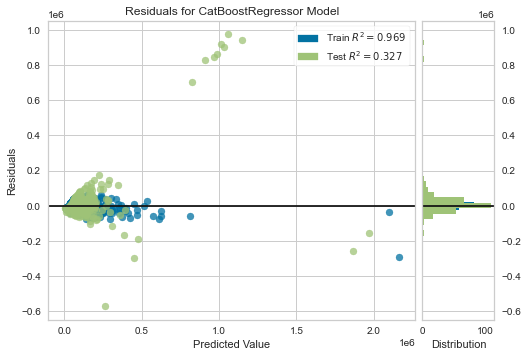

In [52]:
catboost=create_model('catboost')
## plotting a model
plot_model(catboost)

In [53]:
tuned = tune_model(catboost)

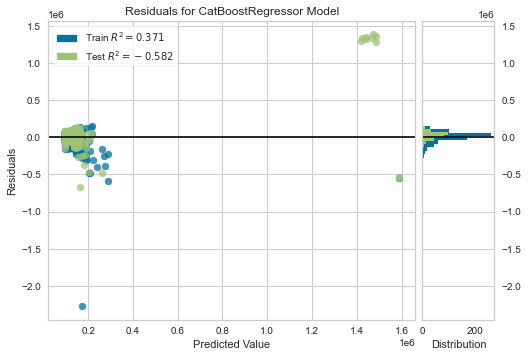

In [54]:
plot_model(tuned)

In [55]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [56]:
# read the test data
test_data_classification = dataset
# make predictions
predictions = predict_model(tuned, data=test_data_classification)
# view the predictions
predictions

İlan_Tarihi   Yıl       Marka        Seri Model1      İlan Başlığı1  \
0     2021-01-21  2015     Citroën          C4    1.6  İKİZLERARABAM'DAN   
1     2021-01-21  2011     Hyundai    i20,Troy    1.2  İKİZLERARABAM'DAN   
2     2021-01-20  2010     Renault      Megane    1.5  İKİZLERARABAM'DAN   
5     2021-01-20  2013        Fiat       Linea    1.3  İKİZLERARABAM'DAN   
6     2021-01-20  1998        Opel       Astra    1.6  İKİZLERARABAM'DAN   
...          ...   ...         ...         ...    ...                ...   
1144  2021-01-08  1999  Mitsubishi     Carisma    1.8              Şahin   
1145  2021-01-08  2014        Opel       Astra    1.6               Opel   
1146  2021-01-08  2008     Hyundai  Accent,Era    1.4              Araba   
1147  2021-01-08  1992        Lada      Samara    1.5            Bakımlı   
1148  2021-01-10  2000        Fiat       Bravo    1.6         sahibinden   

           Renk      KM  İl / İlçe1  İl / İlçe2   Fiyat          Label  
0         Beyaz  148000   Gaziantep  Şehitkamil  144000  127767.959682  
1         Beyaz   94000   Gaziantep  Şehitkamil   77000  144231.598828  
2         Siyah  227933   Gaziantep  Şehitkamil   88000   98674.216046  
5     Gümüş,Gri  183566   Gaziantep  Şehitkamil   94500   98674.216046  
6      Lacivert  275745   Gaziantep  Şehitkamil   55000   95526.245059  
...         ...     ...         ...         ...     ...            ...  
1144   Lacivert  239000  Kırklareli      Merkez   43000   98674.216046  
1145      Beyaz  125000   Gaziantep      Araban  133000  136833.304681  
1146       Mavi     120  Diyarbakır      Bağlar   83000  144231.598828  
1147    Kırmızı  110000       İzmir  Karabağlar   20750  136833.304681  
1148    Kırmızı  216000       Bursa   Osmangazi   38000   98674.216046  

[1000 rows x 12 columns]

In [57]:
import pandas as pd
from IPython.display import display
pd.options.display.max_rows = None


new = predictions.filter(['Fiyat','Label'], axis=1)
new.round({"Label":0})
new.style.format('{:,}')


In [58]:
new = new.round().astype(int)
new.style.format('{:.}')
new

Fiyat    Label
0      144000   127768
1       77000   144232
2       88000    98674
5       94500    98674
6       55000    95526
7       55000    95526
8       84000    98674
9       62000    95526
11     278000   133118
12     127000   136833
13      39800    95526
14     162000   131202
15      94500   133118
16      89000    98674
17     115000    98674
18      38500    95526
19      76000   129790
20      26000    95526
21     155000   144232
22      28000    98674
23     115000    98674
24     111000   100916
25      38500    95526
28      76000   129790
29     146000   114642
30      34500    98674
31      26000    95526
32     155000   144232
33      28000    98674
34     147500   163927
35     116000    98674
36      95750    98674
37      43000   115221
38      54500   154716
39      65000   115221
40     147000   152813
41      31000    98674
42     119500   136833
43     152000    98674
44      43000    95526
46      96500    98674
47      43500   118369
48     125000   133118
51      60000   218567
52     147500   131202
53      49900    98674
54     161000   163927
55      62000    98674
56      45000   110659
57      61000    95526
58      88000    98674
59      78000    98674
60      58000    95526
61     112500    98674
62      36000   115221
63      92500   136833
64      92500    98674
65      40000    95526
66      59500    98674
67     335000   189698
69     139000   120036
70     172500   144232
71      63000    98674
74     147000   174614
75     144500   144232
76     180000   156528
77     250000   144232
78      94000   163927
79      52000   144232
80      23750   144232
81     121500   136833
82      47500   133118
83     144000   144232
84     112000    98674
85      55000    95526
86      82000   113612
87      95000    98674
88      79500    95526
89     417000   184394
90     269000   136833
92     238000   144232
93     172500    98674
94     224000   136833
97     255000   127298
98      52500    95526
99     275000   144232
100    215650   121326
101    139000   163927
102    185000   127298
103     91000  1441961
104     47500   162317
105    125000   136833
106     42500   118369
107     51500    98674
108    105000   136833
109    135000    95526
110    156700   144232
111     90000    98674
112     87500    95526
113     35000   144232
115     16000    98674
116    135000   156528
117    122000   131202
120     62000   131202
121     25500   144232
122    116000   144232
123    875650   289924
124    689650   207046
125     88500   144232
126    106000   144232
127    149650   159485
128     23000    95526
129     99000    98674
130    142500   133118
131     79650   115221
132     66650   136264
133     89999   115221
134    340000   162317
135     45500   144232
136    183000   136833
138     22750   144232
139    148500   144232
140     34999    95526
143     62000    95526
144     74000   118369
145     83000   133118
146    195000   157880
147     42000   144232
148    263000   144232
149    114999   138185
150     83100   114642
151     35000   115221
152    108000   136833
153    164000   163927
154    195000   163927
155    104750    98674
156    114750   144232
157     69000   144232
158    137000   156528
159     85750   144232
161    175000   163927
162    135000   163927
163    156000   136833
166    111000   163927
167    118000   163927
168    185555   165457
169    130500   163927
170    126000   136833
171     29500    98674
172    135000   163927
173     43000    95526
174     77850   115221
175    525000   221715
176     37000   144232
177    115000   131202
178    125000   144232
179    115000   149485
180    125000   118369
181     79000    98674
182    220000   131202
184    132000   144232
185     89000   117795
186    118000  1419118
188    152500    98674
189    440000   189698
190     41750    95526
191     23500   144232
192     33000   118369
193     60500    95526
194     21000    95526
195    114500   156528
196    107000   133118
197    108000   144232
198   

In [73]:
data1 = {'İlan_Tarihi':['2021-01-12'],'Yıl':[2009],'Marka':['Renault'],'Seri':["Megane"],'Model1':["1,6"],'İlan Başlığı1':["Sahibinden"],'Renk':["Beyaz"],'KM':[150000],'İl / İlçe1':["İstanbul"],'İl / İlçe2':["Esenyurt"]}
data1 = pd.DataFrame(data1)
data2 = {'İlan_Tarihi':['2021-01-12'],'Yıl':[2009],'Marka':['Renault'],'Seri':["Megane"],'Model1':["1,6"],'İlan Başlığı1':["Sahibinden"],'Renk':["Beyaz"],'KM':[150000],'İl / İlçe1':["Şanlıurfa"],'İl / İlçe2':["Karaköprü"]}
data2 = pd.DataFrame(data2)

In [74]:
predictions1 = predict_model(tuned, data=data1)
# view the predictions
predictions1

İlan_Tarihi   Yıl    Marka    Seri Model1 İlan Başlığı1   Renk      KM  \
0  2021-01-12  2009  Renault  Megane    1,6    Sahibinden  Beyaz  150000   

  İl / İlçe1 İl / İlçe2          Label  
0   İstanbul   Esenyurt  146418.118974

In [75]:
predictions2 = predict_model(tuned, data=data2)
# view the predictions
predictions2

İlan_Tarihi   Yıl    Marka    Seri Model1 İlan Başlığı1   Renk      KM  \
0  2021-01-12  2009  Renault  Megane    1,6    Sahibinden  Beyaz  150000   

  İl / İlçe1 İl / İlçe2          Label  
0  Şanlıurfa  Karaköprü  117794.697311

In [76]:
Fark=predictions1["Label"]-predictions2["Label"]
Fark

0    28623.421663
Name: Label, dtype: float64